In [42]:
import time
import math
import matplotlib.pyplot as plt
from fractions import Fraction
from itertools import combinations

In [43]:
# ==============================================================================
# Fungsi Greedy (tidak berubah, digunakan sebagai helper)
# ==============================================================================
def greedy_egyptian_benchmark(p, q):
    """
    Versi benchmark dari algoritma Greedy.
    Mengembalikan list penyebut untuk diolah lebih lanjut.
    """
    # Menggunakan objek Fraction untuk penanganan pecahan yang lebih aman.
    frac = Fraction(p, q)
    denominators = []

    while frac.numerator != 0:
        # math.ceil(1 / frac) secara otomatis menghitung penyebut berikutnya.
        x = math.ceil(1 / frac)
        denominators.append(x)
        # Kurangi pecahan dengan 1/x untuk iterasi selanjutnya.
        frac -= Fraction(1, x)

    return denominators

In [44]:
# ==============================================================================
# MESIN BRUTE FORCE BARU: Stewart's Bounded Recursive Method
# ==============================================================================

def _get_divisors(n):
    """Fungsi helper untuk mendapatkan semua pembagi dari sebuah angka n."""
    divs = set()
    for i in range(1, int(math.sqrt(n)) + 1):
        if n % i == 0:
            divs.add(i)
            divs.add(n//i)
    return sorted(list(divs))

def _solve_two_terms(frac, min_denom):
    """
    Fungsi khusus yang dioptimalkan untuk menyelesaikan x/y = 1/a + 1/b.
    Ini adalah implementasi dari 'EgyptTwoTerm'.
    """
    x, y = frac.numerator, frac.denominator
    solutions = []

    # Kita cari faktor r dari y^2
    y_squared_divs = _get_divisors(y**2)

    for r in y_squared_divs:
        # Optimasi: s = y^2 / r, kita hanya perlu cek sampai r <= y
        if r > y:
            break

        s = (y**2) // r

        # Cek apakah (r+y) bisa dibagi habis oleh x
        if (r + y) % x == 0:
            a = (r + y) // x
            # Cek juga apakah (s+y) bisa dibagi habis oleh x
            if (s + y) % x == 0:
                b = (s + y) // x
                # Pastikan penyebut baru tidak lebih kecil dari batas minimum
                # dan a < b untuk menghindari duplikat
                if a >= min_denom and a < b:
                    solutions.append([a, b])

    # Kembalikan solusi terpendek (jika ada beberapa)
    return solutions[0] if solutions else None


def _stewart_recursive(q, k, min_denom, current_denoms):
    """
    Fungsi rekursif inti berdasarkan metode Stewart.
    q: sisa pecahan, k: sisa suku, min_denom: penyebut terkecil berikutnya,
    current_denoms: list penyebut yang sudah ditemukan.
    """
    # KASUS DASAR 1: Jika pecahan habis, kita berhasil.
    if q == 0:
        return current_denoms

    # KASUS DASAR 2: Jika sisa suku adalah 2, gunakan metode optimisasi.
    if k <= 2:
        two_term_solution = _solve_two_terms(q, min_denom)
        if two_term_solution:
            return current_denoms + two_term_solution
        else:
            return None # Gagal menemukan solusi 2 suku

    # BATAS PENCARIAN CERDAS (Kunci dari Metode Stewart)
    # Batas bawah untuk penyebut berikutnya 'i'
    lower_bound = max(min_denom, math.ceil(1/q))
    # Batas atas untuk penyebut berikutnya 'i'
    upper_bound = math.floor(k/q)

    # Lakukan loop rekursif dalam batas yang sudah ditentukan
    for i in range(lower_bound, upper_bound + 1):
        # Panggil diri sendiri dengan sisa pecahan, sisa suku berkurang 1,
        # dan penyebut minimum berikutnya adalah i + 1.
        result = _stewart_recursive(
            q - Fraction(1, i),
            k - 1,
            i + 1,
            current_denoms + [i]
        )
        # Jika panggilan rekursif tadi menemukan solusi, langsung kembalikan.
        if result:
            return result

    # Jika semua kemungkinan 'i' sudah dicoba dan tidak ada solusi
    return None

def brute_force_stewart_method(x, y):
    """
    Fungsi pembungkus yang memulai pencarian menggunakan metode Stewart.
    """
    print("Menjalankan Brute Force (Stewart's Bounded Method)...")
    frac = Fraction(x, y)

    # Kita mulai mencari dari 2 suku, lalu 3, dst. (Iterative Deepening)
    k = 2
    while True:
        print(f"  > Mencari solusi dengan {k} suku...")
        solution = _stewart_recursive(frac, k, 1, [])

        if solution:
            return solution

        k += 1
        # Pengaman darurat agar tidak berjalan selamanya
        if k > 10:
            return ["Gagal menemukan solusi dalam 10 suku"]

Memulai benchmark untuk pecahan: 4/13

Menjalankan Greedy...
Hasil Greedy: 1/4 + 1/18 + 1/468
Waktu eksekusi Greedy: 0.0001043000 detik

Menjalankan Brute Force (Stewart's Bounded Method)...
  > Mencari solusi dengan 2 suku...
  > Mencari solusi dengan 3 suku...
Hasil Brute Force (Stewart's): 1/4 + 1/18 + 1/468
Waktu eksekusi Brute Force: 0.0001601000 detik

Membuat visualisasi grafik...


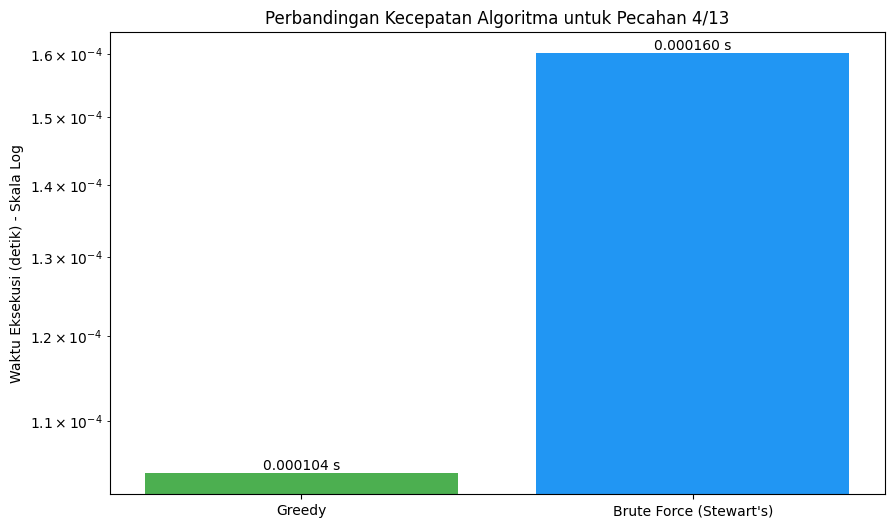

In [45]:
# ==============================================================================
# SKRIP UTAMA UNTUK BENCHMARK DAN PLOT
# ==============================================================================

# Pecahan yang akan diuji. Coba ubah-ubah nilai ini!
pembilang = 4
penyebut = 13

print(f"Memulai benchmark untuk pecahan: {pembilang}/{penyebut}\n")

# --- Benchmark Algoritma Greedy ---
print("Menjalankan Greedy...")
start_time_greedy = time.perf_counter()
result_greedy = greedy_egyptian_benchmark(pembilang, penyebut)
end_time_greedy = time.perf_counter()
time_greedy = end_time_greedy - start_time_greedy
print(f"Hasil Greedy: 1/{' + 1/'.join(map(str, result_greedy))}")
print(f"Waktu eksekusi Greedy: {time_greedy:.10f} detik\n")


# --- Benchmark Algoritma Brute Force BARU (Metode Stewart) ---
start_time_bf = time.perf_counter()
result_bf = brute_force_stewart_method(pembilang, penyebut)
end_time_bf = time.perf_counter()
time_bf = end_time_bf - start_time_bf

if result_bf and isinstance(result_bf[0], int):
    print(f"Hasil Brute Force (Stewart's): 1/{' + 1/'.join(map(str, result_bf))}")
else:
    print("Brute force gagal menemukan solusi.")
print(f"Waktu eksekusi Brute Force: {time_bf:.10f} detik\n")


# --- Membuat Plot Grafik ---
print("Membuat visualisasi grafik...")

algorithms = ['Greedy', "Brute Force (Stewart's)"]
times = [time_greedy, time_bf]

plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, times, color=['#4CAF50', '#2196F3'])

plt.ylabel('Waktu Eksekusi (detik)')
plt.title(f'Perbandingan Kecepatan Algoritma untuk Pecahan {pembilang}/{penyebut}')
plt.yscale('log')
plt.ylabel('Waktu Eksekusi (detik) - Skala Log')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.6f} s', va='bottom', ha='center')

plt.show()
